In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('CSVFiles/training-data-positive-and-negative-sentiment-english.csv')

In [4]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Date,text,Sentiment
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,Positive
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive
2,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,Positive
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,Positive


In [5]:
df.shape

(59500, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59500 entries, 0 to 59499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       59500 non-null  object
 1   text       59500 non-null  object
 2   Sentiment  59500 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


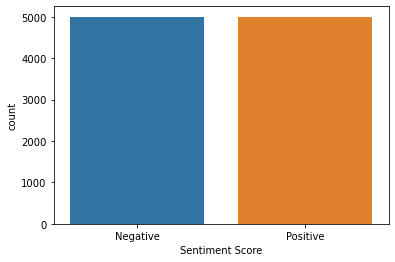

In [9]:
sns.countplot(x=df.Sentiment)
plt.xlabel('Sentiment Score')
# df = df.sample(n=10000, ignore_index=True)
# df.to_csv('CSVFiles/training-data-positive-negative.csv')

In [8]:
# since there are no neutral tweets in our training data, we got some from Kaggle 
df1 = pd.read_csv('CSVFiles/bitcointweets.csv')
df1.head()

,Fri Mar 23 00:40:32 +0000 2018,text,myresumerocket,16522,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Sentiment
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']


In [9]:
df1 = df1.iloc[:,[1,7]]
df1 = df1.loc[df1["Sentiment"]=="['neutral']"]
df1.reset_index(drop=True)

,text,Sentiment
0,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral']
1,One click to start mining cryptocurrencies tog...,['neutral']
2,RT @livemarketcap: ICE Agency Charges Payza an...,['neutral']
3,RT @Vaultoro: We have all seen the HTTP protoc...,['neutral']
4,@eatBCH @Bitcoin @signalapp @myWickr @Samsung ...,['neutral']
...,...,...
21933,Bitcoin: Mastering Bitcoin: Discover How I (An...,['neutral']
21934,"#Zhao #Dong #Recounts How He Lost 9,000 #BTC h...",['neutral']
21935,Bitcoin Price Technical Analysis for 03/23/201...,['neutral']
21936,"RT @PhotoCoin_io: 2,000,000 PHT TOKEN #airdrop...",['neutral']


In [10]:
df1=df1.assign(Sentiment='Neutral')

In [11]:
df1.tail()

,text,Sentiment
50845,Bitcoin: Mastering Bitcoin: Discover How I (An...,Neutral
50847,"#Zhao #Dong #Recounts How He Lost 9,000 #BTC h...",Neutral
50850,Bitcoin Price Technical Analysis for 03/23/201...,Neutral
50852,"RT @PhotoCoin_io: 2,000,000 PHT TOKEN #airdrop...",Neutral
50855,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",Neutral


In [12]:
df = pd.concat([df,df1], ignore_index=True)

Text(0.5, 0, 'Sentiment Score')

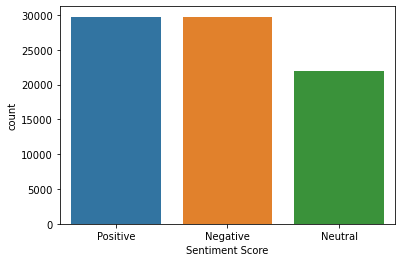

In [13]:
sns.countplot(x=df.Sentiment)
plt.xlabel('Sentiment Score')

In [14]:
df.tail()

,Date,text,Sentiment
81433,NaN,Bitcoin: Mastering Bitcoin: Discover How I (An...,Neutral
81434,NaN,"#Zhao #Dong #Recounts How He Lost 9,000 #BTC h...",Neutral
81435,NaN,Bitcoin Price Technical Analysis for 03/23/201...,Neutral
81436,NaN,"RT @PhotoCoin_io: 2,000,000 PHT TOKEN #airdrop...",Neutral
81437,NaN,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",Neutral


In [15]:
df[df['Sentiment']=='Positive'].count().Sentiment

29741

In [16]:
df[df['Sentiment']=='Negative'].count().Sentiment

29759

In [17]:
df[df['Sentiment']=='Neutral'].count().Sentiment

21938

In [18]:
dfpos = df[df['Sentiment']=='Positive']
dfneg = df[df['Sentiment']=='Negative']
dfneu = df[df['Sentiment']=='Neutral']

In [19]:
# now select 10,000 tweets with positive/negative/neutral ratio of 36/36/28 
dfpos = dfpos.sample(n=3600, ignore_index=True)
dfneg = dfneg.sample(n=3600, ignore_index=True)
dfneu = dfneu.sample(n=2800, ignore_index=True)

In [22]:
df = pd.concat([dfpos, dfneg, dfneu], ignore_index=True)
df.tail()

,Date,text,Sentiment
9995,NaN,@TweetyBirdbrain @ProfFaustus @itsokaytodance ...,Neutral
9996,NaN,0 to 50% – Time to Pay Crypto Taxes in the Eur...,Neutral
9997,NaN,RT @BTCTN: Chinese Exchange Bitasia Now Suppor...,Neutral
9998,NaN,Nice💰 https://t.co/76hs0wzbXA,Neutral
9999,NaN,Bitcoin Cash Price Technical Analysis – BCH/US...,Neutral


In [23]:
df.to_csv('CSVFiles/training-data.csv')